# Introduction to K-Means clustering

K-Means clustering is one of the most frequently used clustering algorithms.
Here, each data-point is assigned to a cluster (i.e. all data-points are part of some cluster), the clusters are spherical in the sense that we use the Eucledian distance during the assignment of data-points to clustes.

The algorithm depends on one hyperparameter: We have to know the number of clusters $k$ _a priori_, either due to external expert knowledge or via hyperparameter tuning.

We start from a dataset $X = {x_1, x_2, \ldots, x_n}$ and the number of clusters $k$. After the algorithm is run, each data-point in $X$ is assigned to one cluster centroids $C = {c_1, \ldots, c_k}$.

In pseudo-code, the algorithm can be described as:

```
1. Initialise cluster centroids
   randomly select $k$ data-points to form the initial centroids for each cluster.

2. REPEAT until cluster assignments no longer change
  2.1 assign each data point to the nearest centroid
      FOR each datapoint x_i in dataset X:
          find clostest cluster centroid c_j in the set of clusters C
          assign x_i to cluster with centroid c_j
      ENDFOR

  2.2 Update cluster centroids
    FOR each cluster with centroid c_j:
      Calculate new cluster centroid c_j as mean of all data-points assigned to this cluster.
    ENDFOR
 ```

In [1]:
# imports
# for generation of test data
from sklearn.datasets import make_blobs

# for visualisation
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import numpy as np

In [4]:
class KMeans():
    def __init__(self, n_clusters, max_iter=500, tolerance=1e-4):
        # hyperparameters
        self.n_clusters = n_clusters

        #safeguard against failed convergence of the clustering
        self.max_iter = max_iter

        # for checking convergence
        self.tolerance = tolerance

        self.centroids = None


    ###
    ### assign datapoints to the clusters
    ### (leading underscore indicates that this meant as "private" function)
    ###
    def _assign_clusters(self, X):
        # calculate Eucledian distance between each point and the centroids
        # https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)

        # assign each point to the cluster that has the closest controid
        return np.argmin(distances, axis=1)

    ###
    ### perform the cluster assignment
    ### follow the scikit-learn convention of fit/predict
    ###
    def predict(self, X):
        return self._assign_clusters(X)

    ###
    ### determine the clusters with centroids
    ### follow the scikit-learn convention of fit/predict
    ###
    def fit(self, X):

        # start with randomly assigning n_clusters centroids
        # https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
        initial_indices = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[initial_indices]

        # iterate to update cluster centroids until convergence
        # or until max. number of iterations is reached
        for i in range(self.max_iter):

            # assign each datapoint to the closest cluster
            cluster_assignments = self._assign_clusters(X)

            # calculate new cluster centroids (based on Eucledian distance)
            new_clusters = np.zeros_like(self.centroids)
            for j in range(self.n_clusters):
                cluster_datapoints = X[cluster_assignments == j]
                if len(cluster_datapoints) > 0:
                    new_clusters[j] = np.mean(cluster_datapoints, axis=0)

            # check for convergence
            # new centroids are within the tolerance of the previously
            # determined centroids
            # https://numpy.org/doc/2.0/reference/generated/numpy.all.html
            if np.all(np.abs(new_clusters - self.centroids) < self.tolerance):
                break

            # update centroids
            self.centroids = new_clusters





## Test the code

To test the code, we first generate a synthetic datset. Here, we use the functionality from [scikit-learn](https://scikit-learn.org/stable/) to generate spherical "blobs" - but you can also experiment with concentric circles or half-moon shape clusters.

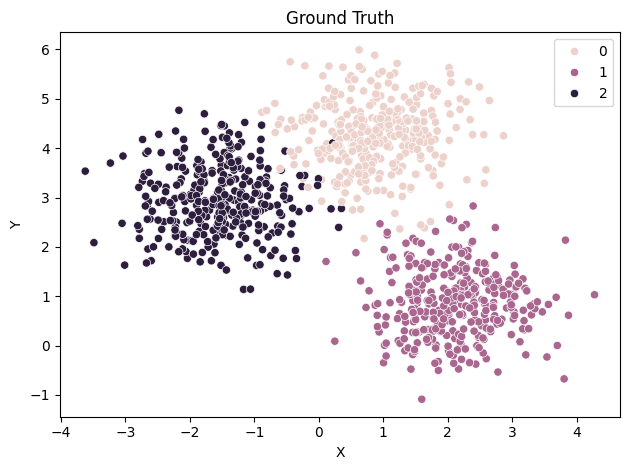

In [5]:
X_blob, y_blob_true = make_blobs(n_samples=1000, centers=3, n_features=2,
                           cluster_std=0.70, random_state=0)

# X_blob is a 2-dimensional array (for the two features we have generated)
# here we split it into the x, y coordinates into separate arrays.
# In a real application, this would be our "data"
#
# y_blob_true are the true labels generated for each data point
x_blob_data=X_blob[0:,0]
y_blob_data=X_blob[0:,1]

sns.scatterplot(x=x_blob_data,y=y_blob_data, hue=y_blob_true)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ground Truth')
plt.tight_layout()
plt.show()

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_blob)

print("Centroids:\n", kmeans.centroids)

Centroids:
 [[ 0.88947314  4.28926235]
 [-1.55879125  2.93739402]
 [ 2.1045864   0.89191914]]


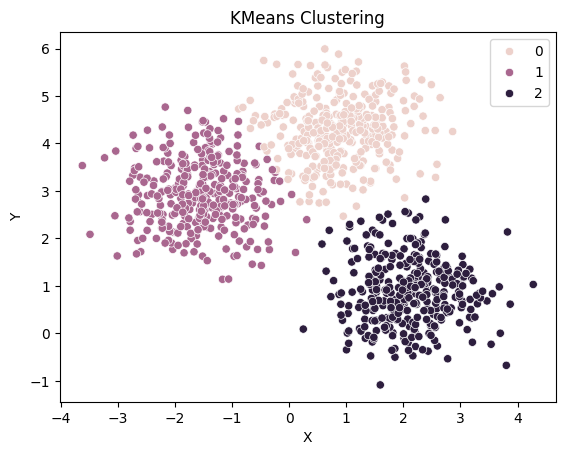

In [9]:
y_hat = kmeans.predict(X_blob)

sns.scatterplot(x=x_blob_data,y=y_blob_data, hue=y_hat)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('KMeans Clustering')
plt.legend()
plt.show()